<h1 style="text-align: center;">System Step Response Using Convolution</h1>
<p style="text-align: center;">Lab 4</p>
<p style="text-align: center;">Spring 2024</p>

### 1. Purpose 
Become familiar with using convolution to compute a system's step response.  

### 2. Deliverables Overview 
##### Part 1  
[ ] Plots for **Task 2**.  
  
##### Part 2
[ ] Plots for **Task 1**.  
[ ] Hand calculated convolution integrals from **Task 2**.  
[ ] Plots for **Task 2**.  

### 3. Part 1
##### 3.1 Purpose
Use the step function you coded previously to operate on given transfer functions.  
##### 3.2 Tasks
1. Create the following signals with user-defined functions.  
$$h_1(t) = e^{2t}u(1 - t)$$  
$$h_2(t) = u(t - 2) - u(t - 6)$$  
$$h_3(t) = \cos{(\omega_0 t)}u(t)$$ for, $f_0 = 0.25$ Hz.  

In [2]:
#Insert all necessary imports here
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig

In [4]:
#Insert your step and convolution functions here
def step(t):
    """
    Creates a step function for duration t
    (taken from lab 2)
    """
    return np.array([1 if t[i] >= 0 else 0 for i in range(len(t))])

def convolveME(f1, f2):
    nf1 = len(f1)
    nf2 = len(f2)
    f1extended = np.append(f1, np.zeros((1, nf2-1)))
    f2extended = np.append(f2, np.zeros((1, nf1-1)))
    result = np.zeros(f1extended.shape)

    for i in range(nf2+nf1-2):
        result[i] = 0 #thinks is redundant
        for j in range(nf1):
            # don't need try and except, just debugging tool
            try:
                result[i] += f1extended[j]*f2extended[i-j+1]
            except:
                print(i,j)
    return result

In [20]:
#Insert the code for the transfer functions here
def h1(t): #transfer 1
    return np.exp(2*t)*step(1-t)
def h2(t): #transfer 2
    return step(t-2) - step(t-6)
def h3(t): #transfer 3
    omega = np.pi * 2 * 0.25 #2PI * frequency
    return np.cos(omega*t)*step(t)

2. Plot the three functions in a single figure (separate subplots) from $-10 \le t \le 10$ with time steps small enough to achieve appropriate resolution. 

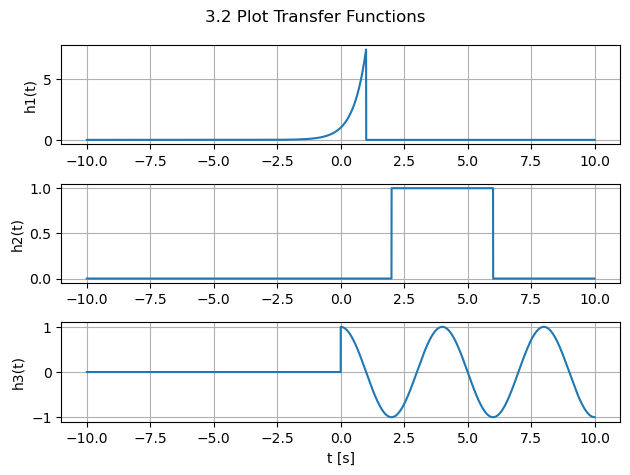

In [21]:
#Insert code calling and plotting the transfer functions in one figure with three subplots here
stepsize = 1e-3
t = np.arange(-10, 10+stepsize, stepsize)
y = h1(t)

plt.figure()
plt.subplot(3, 1, 1)
plt.plot(t, y, label = "h1(t)")
plt.grid()
plt.ylabel("h1(t)")
plt.suptitle("3.2 Plot Transfer Functions")

t = np.arange(-10, 10+stepsize, stepsize)
y = h2(t)

plt.subplot(3, 1, 2)
plt.plot(t, y, label = "h2(t)")
plt.grid()
plt.ylabel("h2(t)")

t = np.arange(-10, 10+stepsize, stepsize)
y = h3(t)

plt.subplot(3, 1, 3)
plt.plot(t, y, label = "h3(t)")
plt.grid()
plt.ylabel("h3(t)")
plt.xlabel("t [s]")
plt.tight_layout()
plt.show()

### 4. Part 2
##### 4.1 Purpose
Find and plot the step response of the three transfer functions defined in **Part 1** using Python and hand calculations.
##### 4.2 Tasks
Perform the following tasks for each of the three transfer functions defined in **Part 1**. Plot each response from $-10 \le t \le 10$ with an appropriate step size.  
1. Plot the step response using your convolution and step functions created earlier.

In [27]:
#Insert code performing the step response for all three transfer functions here
def stepRes(t): #step function to be convolved with transfer functions
    return step(t)

def y1(t): #step response 1
    return convolveME(h1(t), stepRes(t))

def y2(t): #step response 2
    return convolveME(h2(t), stepRes(t))

def y3(t): #step response 3
    return convolveME(h3(t), stepRes(t))

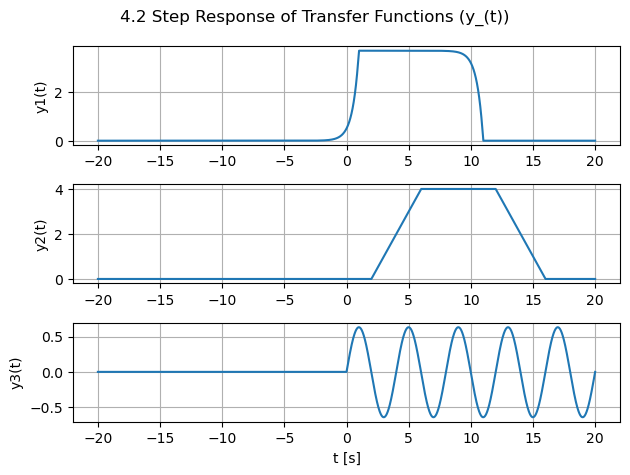

In [39]:
#Insert code plotting all three step responses in one figure with three subplots here
stepsize = 1e-2
t = np.arange(-10, 10+stepsize, stepsize)
tLong = np.arange(2*t[0], 2*t[len(t)-1]+stepsize, stepsize)
y = y1(t)*stepsize

plt.figure()
plt.subplot(3, 1, 1)
plt.plot(tLong, y)
plt.grid()
plt.ylabel("y1(t)")
plt.suptitle("4.2 Step Response of Transfer Functions (y_(t))")

t = np.arange(-10, 10+stepsize, stepsize)
y = y2(t)*stepsize

plt.subplot(3, 1, 2)
plt.plot(tLong, y)
plt.grid()
plt.ylabel("y2(t)")

t = np.arange(-10, 10+stepsize, stepsize)
y = y3(t)*stepsize

plt.subplot(3, 1, 3)
plt.plot(tLong, y)
plt.grid()
plt.ylabel("y3(t)")
plt.xlabel("t [s]")
plt.tight_layout()
plt.show()

2. By hand, calculate the step response of each transfer function by solving the convolution integral. Plot the results and ensure they match the plots from **Task 1**. *Note: Recall for this class all math must be done symbolically not numerically.*

>Insert your hand calculated integrals here. Show all necessary work and write them using LaTeX math mode.  
>$y_1 = N/A$  

>$y_2 = [u(t-2)-u(t-6)] * u(t)$<br>
>$y_2 = \int_{-\infty}^{\infty} [u(t-2)-u(t-6)]*u(t-\tau)\,d\tau$  <br>
>$y_2 = \int_{-\infty}^{t} u(t-2)-u(t-6)\,d\tau$<br>
>$y_2 = [r(t-2) - r(t-6)] * u(t)$

>$y_3 = \cos((\omega)*t)*u(t) * u(t)$   <br>
>$y_3 = \cos((\omega)*t)*u(t) * u(t)$ <br>
>$y_3 = \int_{-\infty}^{\infty} [\cos(\omega *t)*u(t)]*u(t-\tau)\,d\tau$ <br>
>$y_3 = \int_{0}^{t} \cos(\omega *t)\, d\tau$ <br>
>$y_3 = \dfrac{1}{\omega} *\sin(\omega *t)*u(t)$

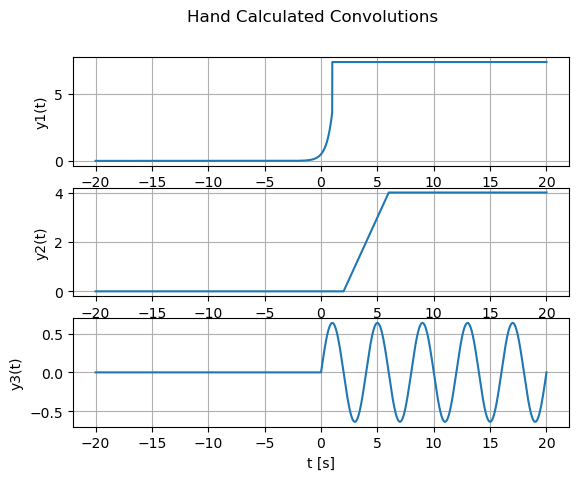

In [49]:
#Insert code plotting your hand calculated step responses in one figure with three subplots here. 
#Note: These won't look exactly like the plots from earlier because a computer has no concept of infinity
def ramp(t):
    """
    Creates a ramp function for duration t
    (taken from lab 2)
    """
    return np.array([t[i] if t[i] >= 0 else 0 for i in range(len(t))])
def handy1(t):
    return 0.5*np.exp(2*t)*step(1-t) + np.exp(2)*step(t-1)
def handy2(t):
    return (ramp(t-2) - ramp(t-6))*step(t)
def handy3(t):
    return np.sin(np.pi/2*t)*(2/np.pi)*step(t)

stepsize = 1e-2
t = np.arange(-10, 10+stepsize, stepsize)
tLong = np.arange(2*t[0], 2*t[len(t)-1]+stepsize, stepsize)
y = handy1(tLong)
plt.figure()
plt.subplot(3, 1, 1)
plt.grid()
plt.plot(tLong, y)
plt.ylabel("y1(t)")
plt.suptitle("Hand Calculated Convolutions")

t = np.arange(-10, 10+stepsize, stepsize)
y = handy2(tLong)
plt.subplot(3, 1, 2)
plt.grid()
plt.plot(tLong, y)
plt.ylabel("y2(t)")

t = np.arange(-10, 10+stepsize, stepsize)
y = handy3(tLong)
plt.subplot(3, 1, 3)
plt.plot(tLong, y)
plt.grid()
plt.ylabel("y3(t)")
plt.xlabel("t [s]")
plt.show()

### 5. Questions
1. Leave any feedback on the clarity of lab tasks, expectations, and deliverables.  
>No feedback :\).